In [1]:
import time,multiprocessing,threading,random as r
import numpy as np
import pandas as pd

In [2]:
np.random.seed(50) # for reproducibilty

In [3]:
fixed = np.random.randint(1,10,size = (5000,5000))  # generates matrix with values between 0 and 10
print(fixed)

[[1 1 2 ... 9 4 6]
 [8 1 6 ... 8 7 8]
 [6 6 1 ... 9 3 7]
 ...
 [7 2 7 ... 3 3 4]
 [7 4 6 ... 7 3 9]
 [2 6 2 ... 3 6 9]]


Function to multiply fixed matrix with a random matrix

In [4]:
def multiply(fixed):
    temp = np.random.randint(1,10,size = (5000,5000))
    temp*fixed
    

define a function that takes no. of thread to make and no. of repetitions

In [5]:
def task(thread_num,reps):
    task_per_thread = reps//thread_num # // results in integer
    start = time.time()
    def multiply_rep(rep):
        for j in range(1,rep+1):
            multiply(fixed)
    threads = []
    for i in range(1,thread_num+1):
        t = threading.Thread(target = multiply_rep,args = (task_per_thread,))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    return round(time.time() - start,4)

Running The code for threads = 1 to 20.

In [6]:
num_cores = multiprocessing.cpu_count()
print(f"No. of Cores : {num_cores}")
threads = []
time_taken = []

for i in range(1,21):
    timetaken = task(i,200)
    threads.append(i)
    time_taken.append(timetaken)

No. of Cores : 16


In [9]:
results = pd.DataFrame({'threads':threads,
                        'timetaken': time_taken 
                        })
print(results)

    threads  timetaken
0         1   151.6999
1         2   144.8455
2         3   140.5331
3         4   143.6248
4         5   144.9216
5         6   143.2939
6         7   139.4404
7         8   142.7990
8         9   142.5757
9        10   141.6849
10       11   142.7475
11       12   138.4285
12       13   137.3216
13       14   139.1120
14       15   139.7402
15       16   138.3548
16       17   134.2259
17       18   141.0589
18       19   136.1073
19       20   141.3644


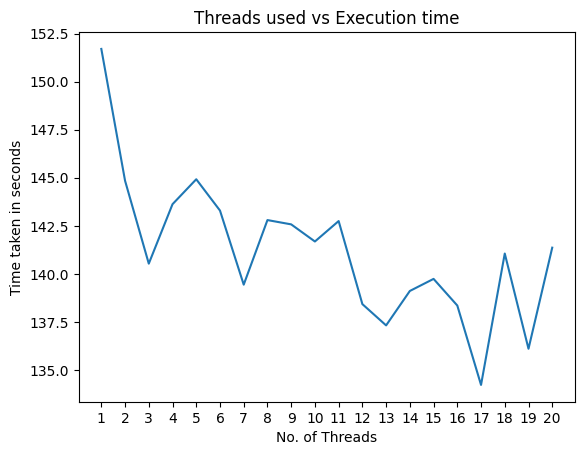

In [8]:
import matplotlib.pyplot as plt

plt.plot(threads,time_taken)

plt.xlabel('No. of Threads')
plt.ylabel('Time taken in seconds')
plt.title("Threads used vs Execution time")
plt.xticks(threads,threads)
plt.show()

It can be Concluded that the Multithreading Works Best when         
 No. of Threads  = no. of cores+1